In [3]:
import time
import random
from math import *
import operator

import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.neighbors import NearestNeighbors

In [4]:
# training data
X = [[0],   [1],    [4],       [55],   [50],    [51],  [60], [80], [84]]
y = [ 0,      0,     0,         1,      1,       1,     1,     2,    2]

In [5]:
# instantiate the classifier 
clf = KNeighborsClassifier(n_neighbors=5)  
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [6]:
# Fit the model using X as training data and y as target values
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
# First step of ML in scikit : Import
#     2nd Step : Instantiate the estimator
#         3rd step : Fit the data to the estimator
#             4th step : Predict or transforming 
# X     y
# ----  --
# 0     0
# 1     0
# 4     0
# 55    1
# 50    1
# 51    1
# 61    1
# 80    2
# 84    2

# Age    Rank   Sal   class
# 33      05    10    0
# 45      56    20    2


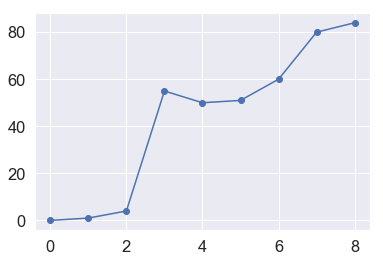

In [8]:
plt.plot( X, marker='o')

In [9]:
test = 82

In [10]:
# Predict the class labels for the provided data
clf.predict([[test]])

array([1])

In [11]:
# Return probability estimates for the test data X.
clf.predict_proba([[test]])

array([[0. , 0.6, 0.4]])

### which neighbors?

__kneighbors_graph__(X=None, n_neighbors=None, mode=’connectivity’)

Computes the (weighted) graph of k-Neighbors for points in X

Parameters:	
- X : The query point or points. 

- n_neighbors : Number of neighbors for each sample. (default is value passed to the constructor).

- mode : {‘connectivity’, ‘distance’}, optional
Type of returned matrix: ‘connectivity’ will return the connectivity matrix with ones and zeros, in ‘distance’ the edges are Euclidean distance between points.

Returns:	
- A : sparse matrix in CSR format, shape = [n_samples, n_samples_fit]


In [52]:
neigh_list = clf.kneighbors([[test]])
neigh_list

(array([[5., 9.]]), array([[7, 8]], dtype=int64))

In [45]:
clf.kneighbors_graph(X=[[test]], n_neighbors=3).toarray()

array([[0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [46]:
ret = clf.kneighbors_graph(X=[[test]], n_neighbors=3).toarray()
ret

array([[0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [47]:
ret_indices = ret ==1
ret_indices.ravel()

array([False, False, False, False, False, False,  True,  True,  True])

In [48]:
np.array(X).ravel()[ret_indices.ravel()]

array([61, 80, 84])

In [9]:
# kneighbors(X=None, n_neighbors=None, return_distance=True)
# Finds the K-neighbors of a point
# Returns indices of and distances to the neighbors of each point.


In [10]:
# training data
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]

In [11]:
# 
neigh = NearestNeighbors(n_neighbors=1)

In [12]:
neigh.fit(samples) 

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=1, p=2, radius=1.0)

In [13]:
print(neigh)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=1, p=2, radius=1.0)


In [18]:
# it returns [[0.5]], and [[2]], which means that the element is at distance 0.5 and 
# is the third element of samples (indexes start at 0). 
neigh.kneighbors([[1., 1., 1.]])

(array([[ 0.5]]), array([[2]], dtype=int64))

#### Finding the Nearest Neighbors

In [189]:
X = np.array([[-1, -1], 
              [-2, -1], 
              [-3, -2], 
              [1,   1], 
              [2,   1], 
              [3,   2]])

__sklearn.neighbors.NearestNeighbors__

The choice of neighbors search algorithm is controlled through the keyword 'algorithm', which must be one of ['auto', 'ball_tree', 'kd_tree', 'brute']. When the default value 'auto' is passed, the algorithm attempts to determine the best approach from the training data.


__Parameters:__
X : array-like, shape (n_query, n_features), or (n_query, n_indexed) if metric == ‘precomputed’
The query point or points. If not provided, neighbors of each indexed point are returned. In this case, the query point is not considered its own neighbor.

n_neighbors : int
Number of neighbors to get (default is the value passed to the constructor).

return_distance : boolean, optional. Defaults to True.
If False, distances will not be returned

__Returns:__
dist : Array representing the lengths to points

ind : Indices of the nearest points in the population matrix.

In [190]:
n_neigh = 3
nbrs = NearestNeighbors(n_neighbors=n_neigh, algorithm='brute').fit(X)

In [191]:
test = [[2, 2]]

In [192]:
distances, indices = nbrs.kneighbors(test)

In [194]:
print('Indices of the ',n_neigh,' nearest points are : ', indices)

Indices of the  3  nearest points are :  [[4 5 3]]


In [195]:
print('Distance to the ',n_neigh,' nearest points are : ',distances)

Distance to the  3  nearest points are :  [[1.         1.         1.41421356]]
